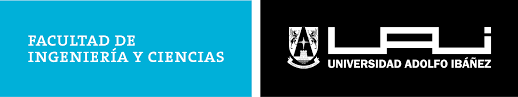


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

**Tópicos**

* Diagrama de flujo


* Análisis exploratorio de datos 

* Barplot

* Histograma



### ¿Cómo estructurar un programa en Python?

Lenguaje de programación de alto nivel debido a su gran utilidad en distintas areas de la informatica, como el desarrollo web o el analisis de datos. Se caracteriza en su legibilidad de código. La codificación se ejecuta directamente, es decir, es un lenguaje interpretado.

Puede adoptar multiples paradigmas, como el imperativo, procedural, orientado a objetos y funcional. Para efectos de este curso, programaremos en imperativo.

En estos paradigmas, por lo general para poder estructurar un codigo coherente, se suele pensar primero en "cómo" se hará el mismo, es decir, primero pensaremos sobre que queremos que tenga y haga nuestro codigo. Por ejemplo, en la vida real, si nos detenemos a pensar en alguna acción, como es tomar agua de una botella, ¿que es lo primero que hacemos? Claro, lo primero que se nos ocurriría sería en tomar la botella con la mano, luego abrir su tapa y beber de ella, después cerramos la botella con la tapa y la dejamos en donde estaba.
Si analizamos esto a más detalle, estamos viendo una secuencia a seguir, un paso a paso:

* 1.- Tomar la botella con la mano
* 2.- Abrir la botella
* 3.- Beber agua
* 4.- Cerrar botella
* 5.- Devolver la botella a donde estaba

Esto mismo ocurre al momento de programar, primero que todo, antes de llegar y codificar, nos tenemos que detener a ver que queremos realmente de nuestro codigo, ¿queremos ver un gráfico? ¿ que tipo de grafico quiero ver? ¿mis variables de adecuarán bien a este? o también, ¿como puedo yo ver cuanta cantidad de personas hay por region? Estas preguntas están muy cercanas al curso, para hacer más visible esto, veamos dos ejemplos:

In [1]:
#Ejemplo 1

n = 1

if(n % 2 == 0):
  print("Es un número par")
else:
  print("No es par")

No es par


Acá estamos viendo una simple condicional en Python, donde el "flujo" del programa se desvía al considerar el modulo de los números, es decir, si el numero que ingresa a la condicional es divisible por dos se considerará par y el programa arrogará el mensaje "Es un número par", en caso de que no lo sea, el flujo se desvía fuera de la condicional if, ingresando al else arrogando el mensaje "No es par".

In [3]:
#Ejemplo 2

print("Eliga que operacion quiere hacer")
print("1.Sumar/ 2.Restar/ 3.Multiplicar/ 4.Dividir")
opcion=int(input("ingrese su opcion: "))
a=int(input("Numero 1: "))
b=int(input("Numero 2: "))

if(opcion == 1 ):
  print(a + b)
elif(opcion == 2 ):
  print(a - b)
elif(opcion == 3 ):
  print(a * b)
elif(opcion == 4 ):
  if(b==0):
    print("Operación inválida")
  else:
    dividir = a/b
    print(dividir)
else:
  print("Opción inválida")

Eliga que operacion quiere hacer
1.Sumar/ 2.Restar/ 3.Multiplicar/ 4.Dividir
Operación inválida


En este segundo ejemplo estamos viendo una simple calculadora de operaciones básicas, la cual, al ingresar la opción que nosotros queramos, nuestro "flujo" se desviará tomando una operación en particular.

Retomemos...

### Analisis exploratorio de datos

Exploratory Data Analysis (EDA) Analiza los datos para resumir sus características principales, usualmente a través de métodos visuales, para obtener una idea inicial de lo que nos dicen los datos.

Técnicas de EDA 

* **Resumen de datos** con métricas de tendencia central, métricas de dispersión o variabilidad, y otras.
* **Gráficos** observando características de cada variables y relaciones entre variables.
* **Detección de outliers** a través de técnicas de visualización y cuantitativas.
* **Técnicas cuantitativas** para determinar el comportamiento de cada variable, o el comportamiento entre ellas. Por ejemplo intervalos de confianza, test de hipótesis sobre la media y varianza, test de distribuciones, one-way ANOVA, coeficiente de correlación de Pearson, Kruskal-Wallis.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


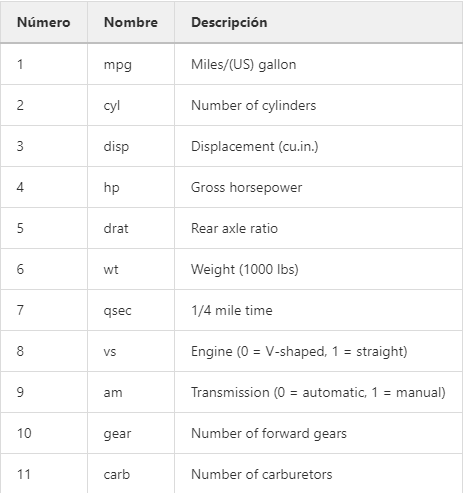

**Datos atipicos (outliers) respecto a una columna (númerica).**

Probemos la columna "drat".

In [4]:
iqr = mtcars["drat"].quantile(q=0.75) - mtcars["drat"].quantile(q=0.25)

max = mtcars["drat"].quantile(q=0.75) + 1.5 * iqr
min = mtcars["drat"].quantile(q=0.25) - 1.5 * iqr

atipicos = mtcars[(mtcars["drat"] > max) | (mtcars["drat"] < min)]
atipicos

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


Ahora probemos con "qsec".

In [5]:
iqr = mtcars["qsec"].quantile(q=0.75) - mtcars["qsec"].quantile(q=0.25)

max = mtcars["qsec"].quantile(q=0.75) + 1.5 * iqr
min = mtcars["qsec"].quantile(q=0.25) - 1.5 * iqr

atipicos = mtcars[(mtcars["qsec"] > max) | (mtcars["qsec"] < min)]
atipicos

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


Otra forma de ver esto de forma visual es ver su Boxplot asociado.

In [6]:
## Importante importar nuestra libreria a utilizar

from plotnine import *

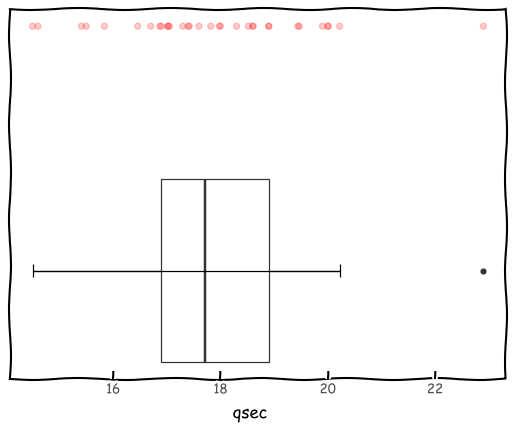

<ggplot: (169392507448)>

In [8]:
(ggplot(mtcars)+
 aes(y="qsec")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



# Visualización de datos

## Plotnine

* Plotnine es una implementación de una gramática de gráficos en Python que se basa en ggplot2 (de R).

## ggplot

* Un paquete creado por Hadley Wickham para la visualización de datos en R
* Este paquete utiliza una gramática de gráficos, que fue desarrollada por Leland Wilkinson.
* ggplot nos entrega un conjunto de componentes que al ser combinadas producen gráficos personalizados.


### Barplot

Generalmente se usa para datos categóricos, así es más simple ver las distribuciones de estos mismos. Como la cantidad de hombres vs mujeres, muertos vs sobrevivientes, etc.

In [9]:
tabla=mtcars["am"].groupby(mtcars["am"]).count()
tabla=pd.DataFrame({"am":tabla.index,"conteo":np.array(tabla)})  #Con replace podemos cambiar el 0 a automatico y 1 a manual
tabla

,am,conteo
0,0,19
1,1,13


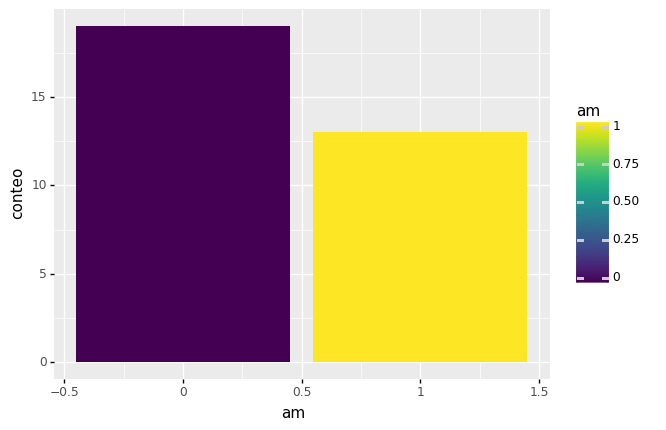

<ggplot: (169392507670)>

In [10]:
(ggplot(tabla)+
 aes(x="am",y="conteo",fill="am")+
 geom_bar(stat="identity") 
)

### Histograma

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


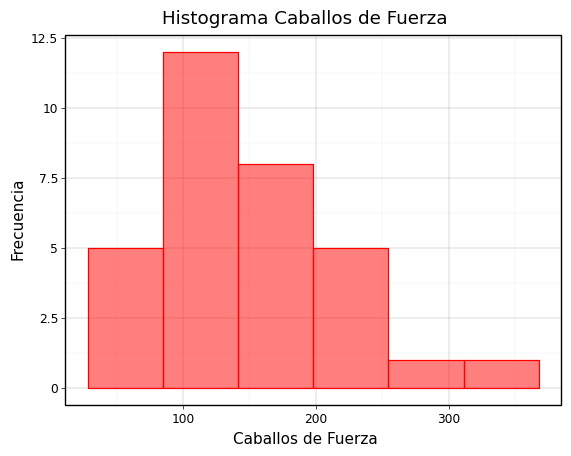

<ggplot: (169392523445)>

In [11]:
(ggplot(mtcars)+
 aes(x="hp")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Histograma Caballos de Fuerza")+
 xlab("Caballos de Fuerza")+
 ylab("Frecuencia")
)

### Scatterplot

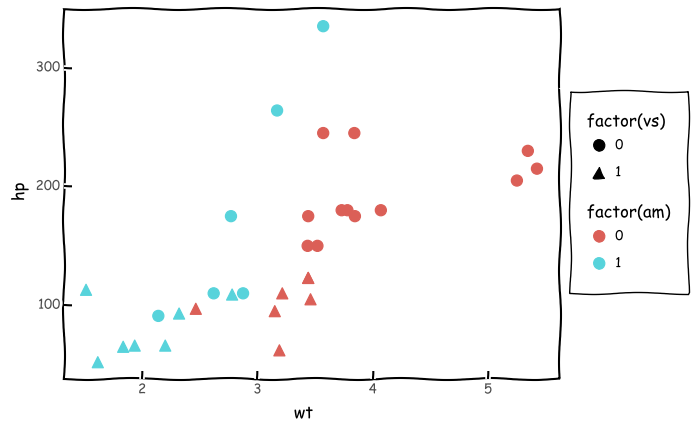

<ggplot: (169394861002)>

In [12]:
(ggplot(mtcars)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
+geom_point(size=4)+
theme_xkcd()
) 

# Ejercicios

## Pregunta 1 

* Con el dataset de Estonia grafique el sexo de sobrevivientes y muertos tras el accidente.

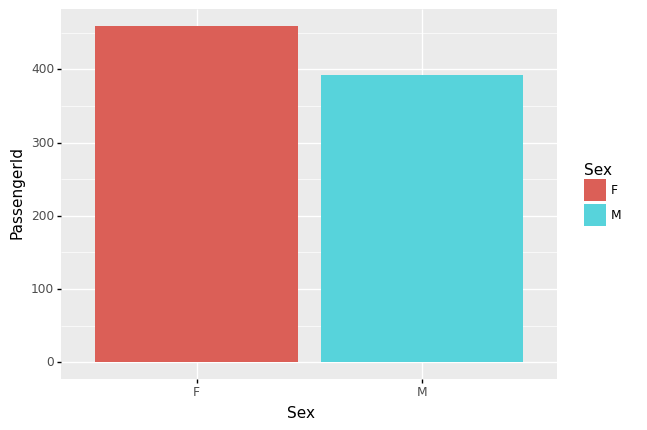

<ggplot: (169394897896)>

In [13]:
df_estonia = pd.read_csv("https://raw.githubusercontent.com/lmudu2/EstoniaDisaster/master/estonia-passenger-list.csv")
df_estonia

df_utilizar = df_estonia[["Sex", "PassengerId", "Survived"]]
df_utilizar = df_utilizar[df_utilizar['Survived'] == 0]
df_utilizar


df_group = df_utilizar.groupby(df_utilizar['Sex'])['PassengerId'].count()
df_group = pd.DataFrame(df_group)
df_group = df_group.reset_index()
df_group

(ggplot(df_group)+ 
 aes(x="Sex",y="PassengerId",fill="Sex")+
 geom_bar(stat="identity") 
)

## Pregunta 2

* Analice la distribución de las edades de la tripulacion de estonia.

## Pregunta 3

* Agrupe por paises la cantidad de sobrevivientes y grafiquelo.

## Pregunta 4

* Analice si existen outliers en el set de datos de Pokemon. (analice cada columna numerica).

## Pregunta 5

* Analice el comportamiento de dos columnas numericas, ¿que puede decir al respecto? ¿existe alguna relación?

## Pregunta 6

* Haga una gráfica que muestre la diferencia de Pokemones legendarios y los que no.

## Pregunta 7

* Haga un estudio completo de los datos de nba, pruebe los tipos de datos, haga limpieza si es necesario, comente como se comportan los datos, etc. (todo lo que se ha visto hasta el momento en el curso).